In [23]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import sklearn.datasets as dta
import scipy.stats as st
from config import get_key

In [ ]:
hopes_awesome_file = pd.read_csv("../Project Jupyter Notebook Files/resources/state_census_df.csv")
hopes_awesome_file.head()

In [3]:
# URL for GET requests to retrieve EV charging station data
url = f"https://developer.nrel.gov/api/alt-fuel-stations/v1.json?api_key=maEf7xJE7aNYy8fzfc7W9Irz2NVbYhhpveg6baXY&fuel_type=ELEC&state=WA,OR,CA,ID,
UT,NV,AZ,WY,MT,NM,CO&limit=all"

In [ ]:
# Pretty print JSON for all EV charging stations in WA,OR,CA,ID,UT,NV,AZ,WY,MT,NM and CO
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

In [25]:
#Create lists to cull out Zipcode, Latitude and Longitude response info:

stations = response['fuel_stations']

state = []
city = []
zip = []
latitude = []
longitude = []

for station in stations:

    state.append(station['state'])
    city.append(station['city'])
    zip.append(station['zip'])
    latitude.append(station['latitude'])
    longitude.append(station['longitude'])
    

In [ ]:
#Create a data frame from State, Zipcode, Latitude and Longitude:

EVstation_dict = {
                "State": state,
                "city": city,
                "Zipcode": zip,
                "latitude": latitude,
                "longitude": longitude
                }

EVstation_data = pd.DataFrame(EVstation_dict)
EVstation_data.head()

In [27]:
len(EVstation_data)

20551

In [28]:
EVstation_data.dtypes
EVstation_data['Zipcode']=EVstation_data['Zipcode'].astype(int)

In [29]:
Evmerged = pd.merge(hopes_awesome_file,EVstation_data,how = "inner", on="Zipcode")

In [37]:
Evmerged.head()

,State ID,Zipcode,Population,Number of Households,Household Income,Poverty Count,Poverty Rate,Total Commute Time,Average Commute Time,Total Vehicles,Average Vehicles per Household,State_x,State_y,city,latitude,longitude
0,30,59011,3120.0,1347.0,49754.0,179.0,5.737179,1195.0,0.887157,950.0,0.705271,MT,MT,Big Timber,45.836300,-109.943400
1,30,59020,63.0,41.0,36875.0,0.0,0.000000,21.0,0.512195,NaN,NaN,MT,MT,Cooke City,45.020792,-109.931145
2,30,59024,444.0,200.0,53136.0,35.0,7.882883,116.0,0.580000,85.0,0.425000,MT,MT,Custer,46.129478,-107.553221
3,30,59030,1211.0,684.0,51694.0,140.0,11.560694,716.0,1.046784,545.0,0.796784,MT,MT,Gardiner,45.029727,-110.707820
4,30,59035,204.0,75.0,47292.0,28.0,13.725490,74.0,0.986667,NaN,NaN,MT,MT,Fort Smith,45.310910,-107.935926


In [30]:
len(Evmerged["Zipcode"])

20260

In [31]:
Evmerged.rename(columns={"State ID":"Number of Stations", "State_y": "State"}, inplace=True)
Evmerged["Number of Stations"] = 1
Evmerged.head()

,Number of Stations,Zipcode,Population,Number of Households,Household Income,Poverty Count,Poverty Rate,Total Commute Time,Average Commute Time,Total Vehicles,Average Vehicles per Household,State_x,State,city,latitude,longitude
0,1,59011,3120.0,1347.0,49754.0,179.0,5.737179,1195.0,0.887157,950.0,0.705271,MT,MT,Big Timber,45.836300,-109.943400
1,1,59020,63.0,41.0,36875.0,0.0,0.000000,21.0,0.512195,NaN,NaN,MT,MT,Cooke City,45.020792,-109.931145
2,1,59024,444.0,200.0,53136.0,35.0,7.882883,116.0,0.580000,85.0,0.425000,MT,MT,Custer,46.129478,-107.553221
3,1,59030,1211.0,684.0,51694.0,140.0,11.560694,716.0,1.046784,545.0,0.796784,MT,MT,Gardiner,45.029727,-110.707820
4,1,59035,204.0,75.0,47292.0,28.0,13.725490,74.0,0.986667,NaN,NaN,MT,MT,Fort Smith,45.310910,-107.935926


In [32]:
del Evmerged["State_x"]
Evmerged.head()

,Number of Stations,Zipcode,Population,Number of Households,Household Income,Poverty Count,Poverty Rate,Total Commute Time,Average Commute Time,Total Vehicles,Average Vehicles per Household,State,city,latitude,longitude
0,1,59011,3120.0,1347.0,49754.0,179.0,5.737179,1195.0,0.887157,950.0,0.705271,MT,Big Timber,45.836300,-109.943400
1,1,59020,63.0,41.0,36875.0,0.0,0.000000,21.0,0.512195,NaN,NaN,MT,Cooke City,45.020792,-109.931145
2,1,59024,444.0,200.0,53136.0,35.0,7.882883,116.0,0.580000,85.0,0.425000,MT,Custer,46.129478,-107.553221
3,1,59030,1211.0,684.0,51694.0,140.0,11.560694,716.0,1.046784,545.0,0.796784,MT,Gardiner,45.029727,-110.707820
4,1,59035,204.0,75.0,47292.0,28.0,13.725490,74.0,0.986667,NaN,NaN,MT,Fort Smith,45.310910,-107.935926


In [58]:
Evmerged['Zipcode'] = Evmerged['Zipcode'].astype(str)
Evmerged_zip = Evmerged.groupby(['Zipcode']).sum()
#pd.set_option("max_rows", None)
Evmerged_zip.head()

,Number of Stations,Population,Number of Households,Household Income,Poverty Count,Poverty Rate,Total Commute Time,Average Commute Time,Total Vehicles,Average Vehicles per Household,latitude,longitude
Zipcode,,,,,,,,,,,,
59011,1,3120.0,1347.0,49754.0,179.0,5.737179,1195.0,0.887157,950.0,0.705271,45.836300,-109.943400
59020,1,63.0,41.0,36875.0,0.0,0.000000,21.0,0.512195,0.0,0.000000,45.020792,-109.931145
59024,1,444.0,200.0,53136.0,35.0,7.882883,116.0,0.580000,85.0,0.425000,46.129478,-107.553221
59030,1,1211.0,684.0,51694.0,140.0,11.560694,716.0,1.046784,545.0,0.796784,45.029727,-110.707820
59035,1,204.0,75.0,47292.0,28.0,13.725490,74.0,0.986667,0.0,0.000000,45.310910,-107.935926


In [34]:
len(Evmerged_zip)

2345

In [42]:
del Evmerged_zip['Poverty Rate']
#del Evmerged_zip['Average Commute Time']
#del Evmerged_zip['Average Vehicles per Household']
#del Evmerged_zip['latitude']
#del Evmerged_zip['longitude']
Evmerged_zip.head()

,Number of Stations,Population,Number of Households,Household Income,Poverty Count,Total Commute Time,Total Vehicles
Zipcode,,,,,,,
59011,1,3120.0,1347.0,49754.0,179.0,1195.0,950.0
59020,1,63.0,41.0,36875.0,0.0,21.0,0.0
59024,1,444.0,200.0,53136.0,35.0,116.0,85.0
59030,1,1211.0,684.0,51694.0,140.0,716.0,545.0
59035,1,204.0,75.0,47292.0,28.0,74.0,0.0


In [43]:
EVcorr = Evmerged_zip
EVcorr.head()

,Number of Stations,Population,Number of Households,Household Income,Poverty Count,Total Commute Time,Total Vehicles
Zipcode,,,,,,,
59011,1,3120.0,1347.0,49754.0,179.0,1195.0,950.0
59020,1,63.0,41.0,36875.0,0.0,21.0,0.0
59024,1,444.0,200.0,53136.0,35.0,116.0,85.0
59030,1,1211.0,684.0,51694.0,140.0,716.0,545.0
59035,1,204.0,75.0,47292.0,28.0,74.0,0.0


In [44]:
EV_corr = EVcorr.corr()
EV_corr.unstack().sort_values()

Total Vehicles        Number of Stations     -0.126004
Number of Stations    Total Vehicles         -0.126004
                      Household Income       -0.122793
Household Income      Number of Stations     -0.122793
Poverty Count         Total Vehicles          0.010444
Total Vehicles        Poverty Count           0.010444
Total Commute Time    Total Vehicles          0.012416
Total Vehicles        Total Commute Time      0.012416
                      Population              0.012487
Population            Total Vehicles          0.012487
Number of Households  Total Vehicles          0.012904
Total Vehicles        Number of Households    0.012904
Poverty Count         Household Income        0.020913
Household Income      Poverty Count           0.020913
Population            Household Income        0.022046
Household Income      Population              0.022046
Total Commute Time    Household Income        0.022250
Household Income      Total Commute Time      0.022250
          

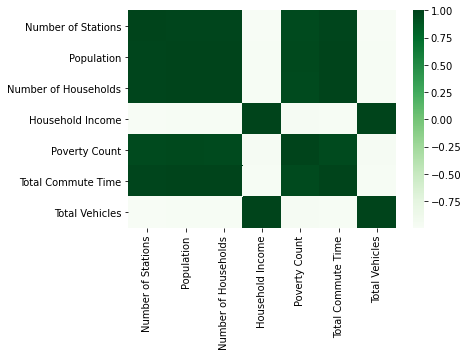

In [56]:
import seaborn as sns

sns.heatmap(EV_corr.corr(), cmap="Greens");